In [1]:
import sys
# sys.path.append('/Users/chandrasekharmukherjee/Home/Centrality framework/MCPC_Clustering/Codes')
sys.path.append('I:/내 드라이브/backup/document/USC/Research/MCPC/Code/Codes')

In [2]:
# This code is to test Louvain Method with custom Modularity Function
import numpy as np
import networkx as nx
import networkx.algorithms.community.quality as nx_quality
import networkx.algorithms.community as nx_comm
# from Custom_Func import directed_modularity, modularity, _one_level

import Custom_Func as Custom_Func


In [3]:
%load_ext autoreload
%autoreload 2
import importlib
import Custom_Func as Custom_Func
import Real_Custom as Real_Custom
Custom_Func = importlib.reload(Custom_Func)
Real_Custom = importlib.reload(Real_Custom)

## Sample Graph

In [ ]:
G = nx.karate_club_graph()
print(G.edges())

In [ ]:
G = nx.karate_club_graph()
#visualize
nx.draw(G, with_labels=True)
#print(G.edges(data=True))

## Louvain Method with Original Q (Modularity) Function

In [ ]:
#Louvain with Normal Q 
partition = nx_comm.louvain.louvain_partitions(G, seed=0)
#Loop through the partition. It is a list of sets
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")

## Louvain Method with Custom Q (Modularity) Function using Monkey Patch (Overload)

UnboundLocalError: local variable 'Q_c' referenced before assignment

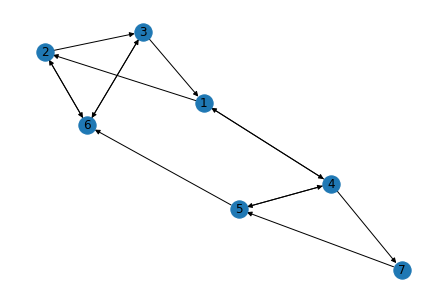

In [18]:
#Louvain with Custom Q (+1 for every community of size 2 / 0 else)
nx_quality.modularity=modularity
nx_comm.louvain._one_level=_one_level
partition = nx_comm.louvain.louvain_partitions(G, seed=0)
#Loop through the partition. It is a list of sets
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")
#


    

# Directed Graph

In [4]:
#Directed graph example

n_s=100
val = np.random.uniform(low=0.0, high=1.0, size=(n_s, n_s))

label=np.zeros((n_s))

for i in range(n_s//2,n_s):
    label[i]=1


G = nx.DiGraph()

for i in range(n_s):
    for j in range(n_s):

        if((i<n_s//2 and j <n_s//2) or (i>n_s//2 and j>n_s//2)):
            if(val[i][j]>0.45):
                G.add_edge(i,j,weight=1)
        else:
            if(val[i][j]>0.55):
                G.add_edge(i,j,weight=1)


#G.add_edges_from([(1,2),(2,3),(3,1),(1,4),(4,1),(4,5),(5,4),(5,6),(6,3),(3,6),(6,2),(2,6),(4,7),(7,5),(7,4)])

# G = nx.DiGraph()
# G.add_nodes_from([1,2,3])
# G.add_edges_from([(2,3),(1,3),(3,1)])#visualize
# nx.draw(G, with_labels=True)

## Original Directed_Modularity

In [10]:
import debug as debug
nx_comm.louvain._one_level=debug._one_level
# nx_quality.modularity=directed_modularity

#Custom directed modularity
# Q_c = 1 if nodes in community c have more than 2 inter-community edges, 0 otherwise
# Q = sum of all Q_c for all community c

#Set every edge weight to 1
# for u,v in G.edges():
#     G[u][v]['weight']=1

#print the edge weights
#print(G.edges(data=True))

partition = nx_comm.louvain.louvain_partitions(G, seed=0)
#Loop through the partition. It is a list of sets
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")

rand_nodes: [39, 13, 20, 11, 99, 22, 1, 43, 63, 32, 25, 80, 17, 77, 47, 3, 96, 90, 41, 88, 28, 10, 40, 15, 67, 51, 33, 49, 55, 72, 62, 50, 85, 53, 87, 48, 60, 95, 86, 23, 76, 98, 8, 29, 24, 30, 54, 34, 64, 89, 12, 7, 92, 42, 66, 94, 81, 0, 4, 61, 65, 57, 5, 78, 59, 36, 44, 75, 35, 97, 31, 2, 68, 79, 14, 52, 74, 27, 38, 91, 56, 46, 21, 84, 70, 26, 82, 45, 18, 93, 69, 73, 16, 71, 83, 58, 9, 19, 37, 6]
weights2com: defaultdict(<class 'float'>, {1: 2.0, 71: 2.0, 2: 2.0, 72: 1.0, 49: 2.0, 4: 1.0, 7: 1.0, 8: 2.0, 10: 1.0, 51: 2.0, 74: 1.0, 11: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 2.0, 17: 2.0, 20: 1.0, 21: 1.0, 54: 1.0, 22: 1.0, 76: 2.0, 55: 1.0, 77: 1.0, 24: 1.0, 91: 2.0, 26: 2.0, 80: 2.0, 81: 2.0, 30: 2.0, 99: 2.0, 83: 2.0, 32: 1.0, 92: 2.0, 35: 1.0, 58: 1.0, 98: 1.0, 60: 1.0, 38: 1.0, 40: 2.0, 63: 2.0, 43: 1.0, 66: 2.0, 68: 1.0, 47: 1.0, 89: 1.0, 70: 1.0, 48: 1.0, 0: 1.0, 9: 1.0, 25: 1.0, 29: 1.0, 33: 1.0, 34: 1.0, 37: 1.0, 39: 1.0, 42: 1.0, 45: 1.0, 52: 1.0, 53: 1.0, 59: 1.0, 61: 1.0, 64:

## Custom Directed Modularity

In [11]:
custom_partition = Custom_Func.louvain_partitions(G, seed=0)
for i, s in enumerate(custom_partition, start=1):
    print(f"Set {i}: {s}")

nbrs: {0: defaultdict(<class 'float'>, {1: 1.0, 3: 1.0, 5: 2.0, 8: 2.0, 9: 1.0, 10: 2.0, 11: 2.0, 13: 2.0, 14: 1.0, 15: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 2.0, 25: 1.0, 26: 1.0, 27: 2.0, 28: 1.0, 29: 1.0, 30: 1.0, 33: 2.0, 39: 1.0, 40: 2.0, 42: 2.0, 44: 1.0, 45: 1.0, 48: 2.0, 49: 2.0, 51: 1.0, 54: 1.0, 56: 2.0, 58: 1.0, 60: 1.0, 61: 2.0, 70: 1.0, 72: 1.0, 73: 2.0, 74: 2.0, 75: 1.0, 77: 1.0, 79: 2.0, 85: 1.0, 86: 2.0, 93: 2.0, 94: 1.0, 96: 2.0, 99: 2.0, 7: 1.0, 16: 1.0, 19: 1.0, 67: 1.0, 71: 1.0, 80: 1.0, 89: 1.0, 91: 1.0, 92: 1.0, 4: 1.0, 18: 1.0, 34: 1.0, 38: 1.0, 41: 1.0, 46: 1.0, 52: 1.0, 87: 1.0, 97: 1.0, 36: 1.0, 43: 1.0, 57: 1.0, 81: 1.0, 37: 1.0, 53: 1.0}), 1: defaultdict(<class 'float'>, {3: 2.0, 5: 2.0, 6: 1.0, 7: 2.0, 10: 1.0, 13: 1.0, 16: 1.0, 17: 1.0, 19: 2.0, 20: 1.0, 21: 2.0, 22: 1.0, 23: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 32: 2.0, 35: 1.0, 39: 2.0, 42: 2.0, 45: 2.0, 48: 1.0, 49: 2.0, 54: 2.0, 56: 2.0, 59: 2.0, 60: 2.0, 61: 1.0, 64: 1.0, 65: 1.0, 67: 2.0, 

[{0, 1, 2, 5, 10, 77, 80, 18, 20, 21, 22, 25, 90, 27, 28, 29, 30, 26, 36, 40, 42, 45, 46, 47, 49}, {64, 68, 69, 70, 72, 74, 79, 81, 84, 87, 91, 92, 94, 32, 33, 52, 53, 62}, {3, 99, 83, 89, 58, 78, 15}, {65, 4, 7, 8, 9, 11, 12, 13, 14, 17, 24, 95, 34, 35, 39, 41, 43, 44, 48, 50}, {66, 67, 6, 71, 73, 75, 76, 16, 82, 19, 85, 86, 23, 88, 93, 31, 96, 97, 98, 37, 38, 51, 54, 55, 56, 57, 59, 60, 61, 63}]
Time taken for original Louvain: 0.03609180450439453
[{0, 1, 2, 5, 10, 77, 80, 18, 20, 21, 22, 25, 90, 27, 28, 29, 30, 26, 36, 40, 42, 45, 46, 47, 49}, {64, 68, 69, 70, 72, 74, 79, 81, 84, 87, 91, 92, 94, 32, 33, 52, 53, 62}, {3, 99, 83, 89, 58, 78, 15}, {65, 4, 7, 8, 9, 11, 12, 13, 14, 17, 24, 95, 34, 35, 39, 41, 43, 44, 48, 50}, {66, 67, 6, 71, 73, 75, 76, 16, 82, 19, 85, 86, 23, 88, 93, 31, 96, 97, 98, 37, 38, 51, 54, 55, 56, 57, 59, 60, 61, 63}]
Time taken for our implementation: 2.5276849269866943


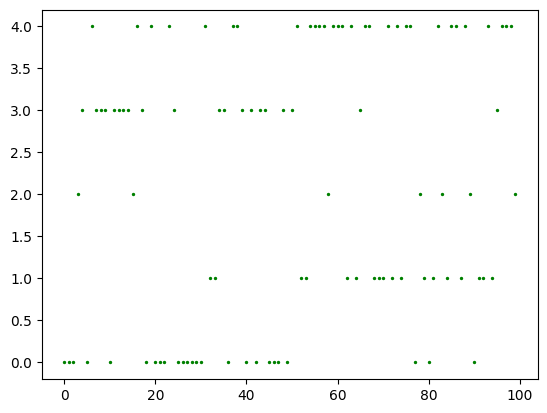

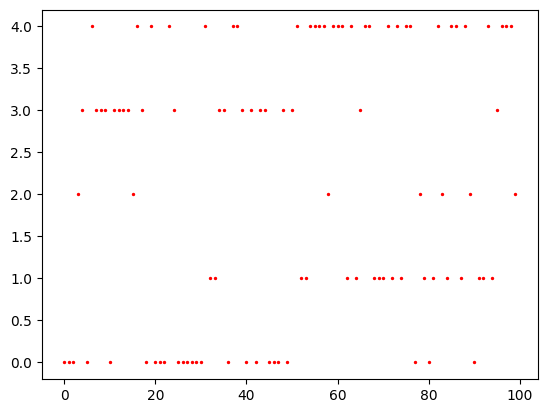

The NMI score of original Louvain compared to true label: 0.225
The NMI score of our implementation compared to true label: 0.225
Are the two partitions same? True


In [13]:
import debug as debug
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import itertools
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI

nx_comm.louvain._one_level=debug._one_level


#run time recording
import time
start = time.time()
og_partition = nx_comm.louvain.louvain_partitions(G, seed=0)

final_partition_1 = deque(og_partition, maxlen=1).pop()
end = time.time()


print(final_partition_1)

print("Time taken for original Louvain:",end-start)

label_1=np.zeros((n_s))
c=0
for sets in final_partition_1:
    for ell in sets:
        label_1[ell]=c
    
    c=c+1


nx_comm.louvain._one_level=Custom_Func._one_level
start = time.time()
partition = nx_comm.louvain.louvain_partitions(G, seed=0)

final_partition_2 = deque(partition, maxlen=1).pop()
end = time.time()
print(final_partition_2)
print("Time taken for our implementation:",end-start)

label_2=np.zeros((n_s))
c=0
for sets in final_partition_2:
    for ell in sets:
        label_2[ell]=c
    c=c+1


xaxis=[i for i in range(n_s)]

plt.Figure()
plt.scatter(xaxis,label_1,s=2,color='green')
plt.show()

plt.Figure()
plt.scatter(xaxis,label_2,s=2,color='red')
plt.show()

print("The NMI score of original Louvain compared to true label:",round(NMI(label,label_1),3))
print("The NMI score of our implementation compared to true label:",round(NMI(label,label_2),3))

#Check if two partitions are same
print("Are the two partitions same?",final_partition_1==final_partition_2)

## FlowRank & Custom Modularity Function

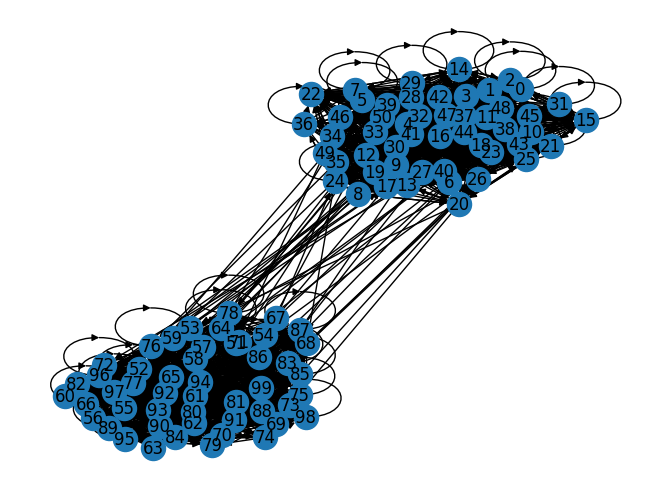

In [12]:
#Directed graph example

n_s=100
val = np.random.uniform(low=0.0, high=1.0, size=(n_s, n_s))

label=np.zeros((n_s))

for i in range(n_s//2,n_s):
    label[i]=1


G = nx.DiGraph()

for i in range(n_s):
    for j in range(n_s):

        if((i<=n_s//2 and j <=n_s//2) or (i>n_s//2 and j>n_s//2)):
            if(val[i][j]>0.3 and ((j<=25) or (j>=75))): #j = core
                G.add_edge(i,j,weight=1)
            elif(val[i][j]>0.9):
                G.add_edge(i,j,weight=1)
        else:
            if(val[i][j]>0.99):
                G.add_edge(i,j,weight=1)


#G.add_edges_from([(1,2),(2,3),(3,1),(1,4),(4,1),(4,5),(5,4),(5,6),(6,3),(3,6),(6,2),(2,6),(4,7),(7,5),(7,4)])

# G = nx.DiGraph()
# G.add_nodes_from([1,2,3])
# G.add_edges_from([(2,3),(1,3),(3,1)])#visualize
nx.draw(G, with_labels=True)

Check FlowRank function

In [13]:
import FlowRank as FR
#print(FR.FLOW_ng(G.edges(),G.nodes(),1)) # (FR, Node#)

node2FR = dict()
for i in FR.FLOW_ng(G.edges(),G.nodes(),1):
    node_num = int(i[1])
    node2FR[node_num] = i[0]

print(node2FR)

{1: 1.0, 75: 1.0, 11: 0.9767441860465117, 77: 0.9590163934426231, 24: 0.9523809523809523, 93: 0.9523809523809523, 90: 0.9512195121951221, 86: 0.9500000000000001, 88: 0.9500000000000001, 94: 0.9500000000000001, 91: 0.9452554744525548, 21: 0.9421487603305784, 87: 0.9411764705882353, 10: 0.9397590361445783, 80: 0.9384057971014491, 4: 0.936, 18: 0.936, 19: 0.9326424870466321, 78: 0.9260450160771704, 15: 0.925, 14: 0.9230769230769232, 16: 0.9211618257261411, 25: 0.9204545454545456, 23: 0.9118236472945891, 12: 0.9113300492610839, 17: 0.9104046242774566, 22: 0.9079754601226994, 13: 0.9077809798270894, 83: 0.9061488673139159, 3: 0.9046563192904657, 85: 0.900735294117647, 0: 0.8983739837398375, 81: 0.8888888888888888, 92: 0.8881987577639753, 79: 0.8859934853420195, 97: 0.885416666666667, 95: 0.8853658536585365, 98: 0.885057471264368, 89: 0.8819599109131404, 82: 0.8807339449541286, 84: 0.870712401055409, 5: 0.863198458574181, 7: 0.8631790744466801, 9: 0.8624113475177304, 96: 0.8502109704641351, 

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}, {51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}]
Time taken for original Louvain: 0.013281106948852539
[{49}, {48}, {32}, {42}, {44}, {45}, {46}, {36}, {27}, {28}, {37}, {50}, {34}, {33}, {43}, {65}, {38}, {39}, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 30, 41, 47, 51, 52, 64, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}, {29}, {31}, {57}, {72}, {40}, {35}, {55}, {53}, {73}, {68}, {59}, {69}, {70}, {56}, {60}, {54}, {61}, {63}, {58}, {71}, {62}, {74}, {66}, {67}]
Time taken for our implementation: 0.3256704807281494


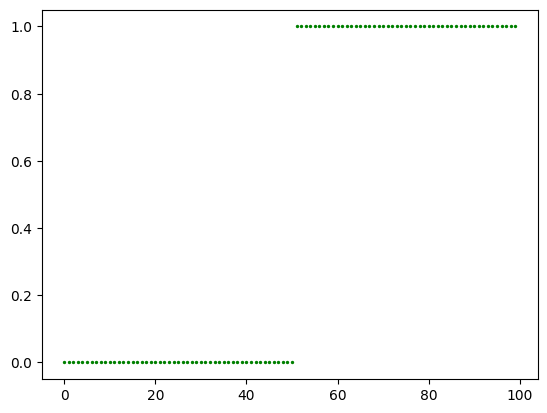

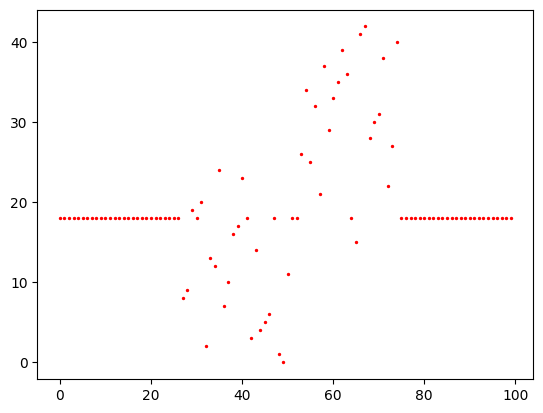

The NMI score of original Louvain compared to true label: 0.929
The NMI score of our implementation compared to true label: 0.198


In [29]:
import debug as debug
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import itertools
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
import Real_Custom

nx_comm.louvain._one_level=debug._one_level


#run time recording
import time
start = time.time()
og_partition = nx_comm.louvain.louvain_partitions(G, seed=0)

final_partition_1 = deque(og_partition, maxlen=1).pop()
end = time.time()


print(final_partition_1)

print("Time taken for original Louvain:",end-start)

label_1=np.zeros((n_s))
c=0
for sets in final_partition_1:
    for ell in sets:
        label_1[ell]=c
    
    c=c+1


start = time.time()
partition = Real_Custom.louvain_partitions(G, seed=0)

final_partition_2 = deque(partition, maxlen=1).pop()
end = time.time()
print(final_partition_2)
print("Time taken for our implementation:",end-start)

label_2=np.zeros((n_s))
c=0
for sets in final_partition_2:
    for ell in sets:
        label_2[ell]=c
    c=c+1


xaxis=[i for i in range(n_s)]

plt.Figure()
plt.scatter(xaxis,label_1,s=2,color='green')
plt.show()

plt.Figure()
plt.scatter(xaxis,label_2,s=2,color='red')
plt.show()


print("The NMI score of original Louvain compared to true label:",round(NMI(label,label_1),3))
print("The NMI score of our implementation compared to true label:",round(NMI(label,label_2),3))
